In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HOUSING/Bengaluru_House_Data.csv',low_memory=False)

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


1. We have 6226 unique values in 13320 values almost the half of them are unique values

In [8]:
sum =0
for label,content in df1.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(f'{label} has {content.nunique()} unique values')
    sum=sum+content.nunique()
print(sum)

area_type has 4 unique values
availability has 81 unique values
location has 1305 unique values
size has 31 unique values
society has 2688 unique values
total_sqft has 2117 unique values
6226


2. We can start Data dropping by personal knownledge or  research

In [9]:
df2=df1.drop(['area_type','availability','society'],axis='columns')

In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [12]:
df1.dropna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [13]:

def drop_or_add(df):
    for label, content in df.items():

        if content.isnull().sum() < 500:
            df = df.dropna(subset=[label])

        else:

            if pd.api.types.is_numeric_dtype(content):
                df[label] = content.fillna(content.mean())

            else:

                df[label] = content.fillna(content.mode()[0])

    return df


In [14]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [15]:
df3=drop_or_add(df2)

In [16]:
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     13246 non-null  float64
 5   price       13246 non-null  float64
dtypes: float64(3), object(3)
memory usage: 724.4+ KB


In [18]:
df2.shape

(13320, 6)

In [19]:
df3.shape

(13246, 6)

In [20]:
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


3. Lets now focus on the columns with complicated data


In [21]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [24]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

4. We can check how extreme bedrooms disributed

In [25]:
df3[df3['bhk']>20]


,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


There cant be 43 bedrooms with 2400 sqrft so we should examine sqrft aswell

In [26]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see sqrft columns has ranged data and we should turn them static numbers for ML


In [27]:
def is_float(x):
  try:
     float(x)
  except:
     return False
  return True

In [28]:
df3[~df3['total_sqft'].apply(is_float)].head(20)


,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.000000,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.000000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.000000,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.000000,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.000000,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.000000,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.000000,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,1.584376,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.000000,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.000000,445.000,4


Lets turn our total sqft column

In [29]:
def turn_sqft(x):
  token=x.split('-')
  if len(token) ==2:
    return (float(token[0])+float(token[1]))/2
  try:
    return float(x)
  except:
    return None



In [30]:
turn_sqft('2166')

2166.0

In [31]:
turn_sqft('2450-4800')

3625.0

In [32]:
df4=df3.copy()
df4['total_sqft']=df4.total_sqft.apply(turn_sqft)

In [33]:
df4.head(5)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [34]:
df5=df4.copy()

In [35]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [36]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [37]:
df5.location.nunique()

1304

In [38]:
df5.location=df5.location.apply(lambda x: x.strip())

In [39]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [40]:
len(location_stats[location_stats<=10])

1052

In [41]:
location_less_then_ten=location_stats[location_stats<=10]

In [42]:
df5.location=df5.location.apply(lambda x : 'other' if x in location_less_then_ten else x)

In [43]:
df5.location.nunique()

242

In [44]:
df5.nunique()

,0
location,242
size,31
total_sqft,1972
bath,19
balcony,5
price,1955
bhk,19
price_per_sqft,7537


In [45]:
for label,content in df5.items():
  if not  pd.api.types.is_numeric_dtype(content):
           print(f'{label} has:{content.nunique() }')


location has:242
size has:31


In [46]:
df5[df5.total_sqft/df5.bhk<400].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,1.584376,370.0,6,36274.509804
16,Bisuvanahalli,3 BHK,1180.0,3.0,2.000000,48.0,3,4067.796610
26,Electronic City,2 BHK,660.0,1.0,1.000000,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,1.000000,47.0,3,4585.365854
31,Bisuvanahalli,3 BHK,1075.0,2.0,1.000000,35.0,3,3255.813953


In [47]:
df5.shape

(13246, 8)

In [48]:
df6=df5[~(df5.total_sqft/df5.bhk<400)]
df6.shape

(11757, 8)

In [49]:
df6.price_per_sqft.describe()

,price_per_sqft
count,11711.000000
mean,6183.801944
std,4009.858885
min,267.829813
25%,4208.337500
50%,5277.777778
75%,6800.000000
max,176470.588235


5. Outlier detection


Distrbution of price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

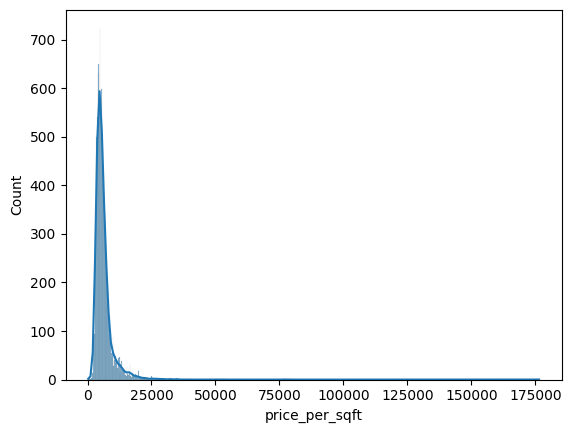

In [50]:
sns.histplot(df6.price_per_sqft,kde=True)

In [51]:
def remove_outliers(df):

  df_no_outliers=pd.DataFrame()

  for key,subdf in df.groupby('location'):
    mean = np.mean(subdf.price_per_sqft)
    std=np.std(subdf.price_per_sqft)

    reduced_df=subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<(mean+std))]
    df_no_outliers=pd.concat([df_no_outliers,reduced_df],ignore_index=True)
  return df_no_outliers


In [52]:
df7=remove_outliers(df6)
df7.shape

(9500, 8)

Distrbution of price_per_sqft after removing outliers


<Axes: xlabel='price_per_sqft', ylabel='Count'>

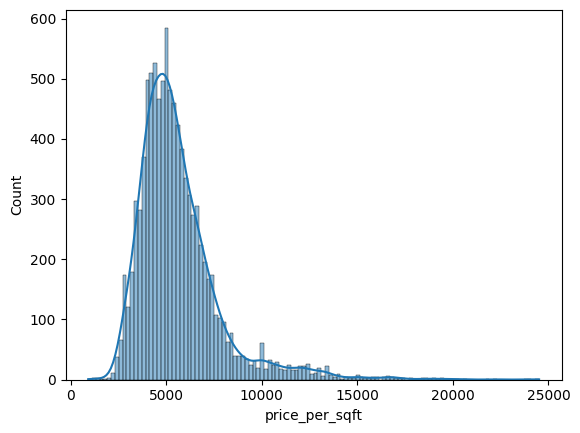

In [53]:
sns.histplot(df7.price_per_sqft,kde=True)

Lets now see the relationship between columns


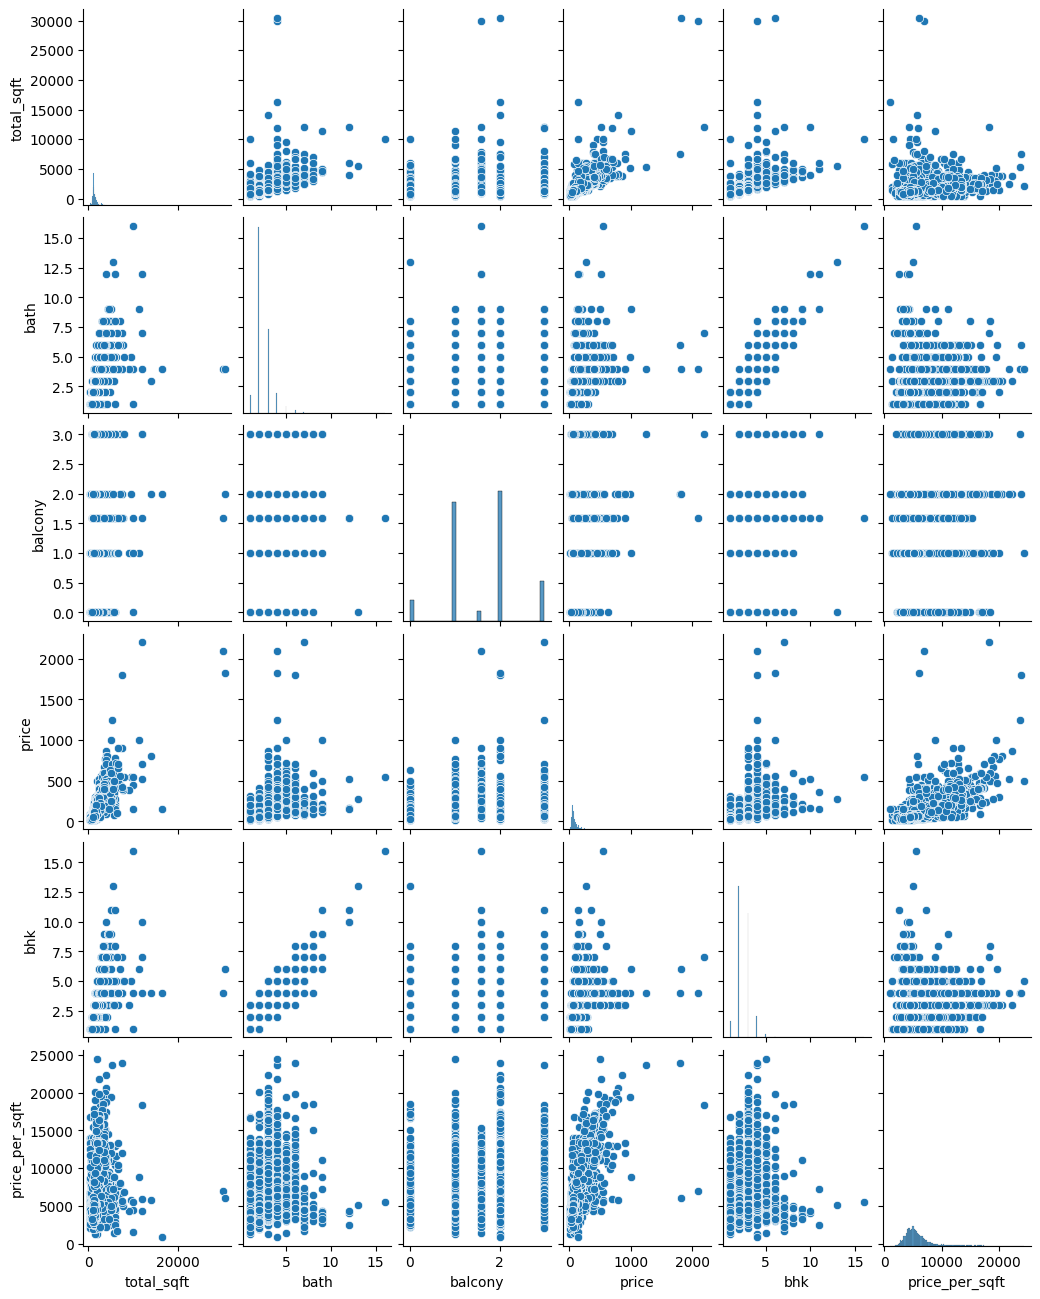

In [54]:
sns.pairplot(df7 ,height=2.2,aspect=0.8)



As we can see there is not a strong relationship between bhk and the price

In [55]:
def plot_chart(df,location):
  bhk2=df[(df.location==location) &(df.bhk==2) ]
  bhk3=df[(df.location==location) & (df.bhk==3)]

  fig,ax =plt.subplots(figsize=(10,10))
  ax.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  ax.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50)
  ax.set_xlabel("Total Square feet Area")
  ax.set_ylabel("Price")
  ax.set_title(location)
  ax.legend()



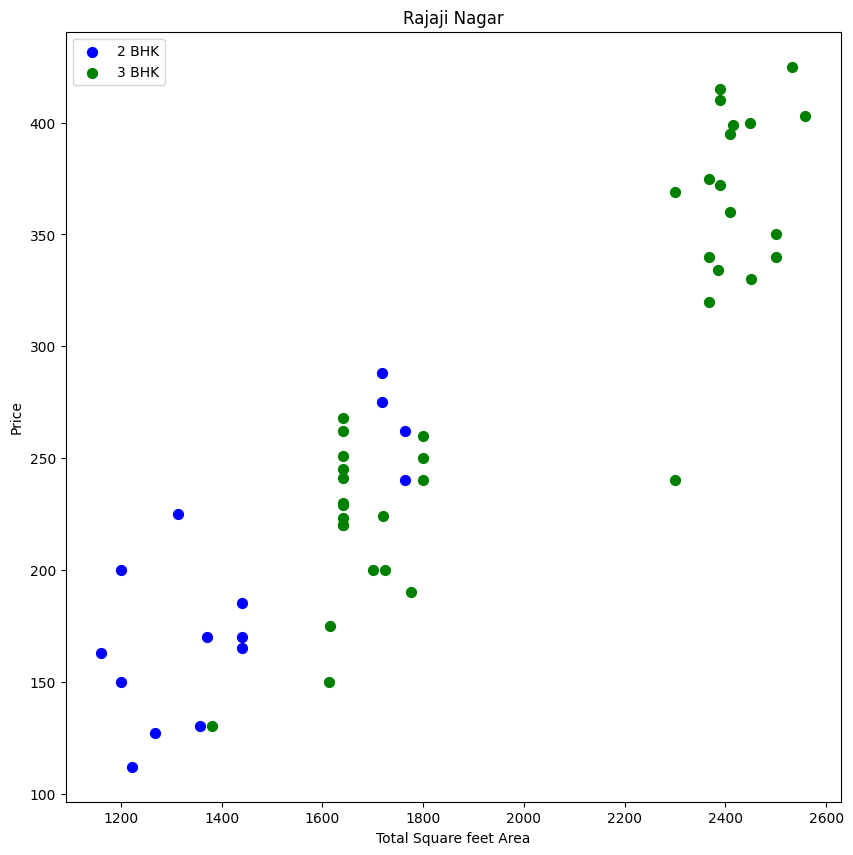

In [56]:
plot_chart(df7,"Rajaji Nagar")

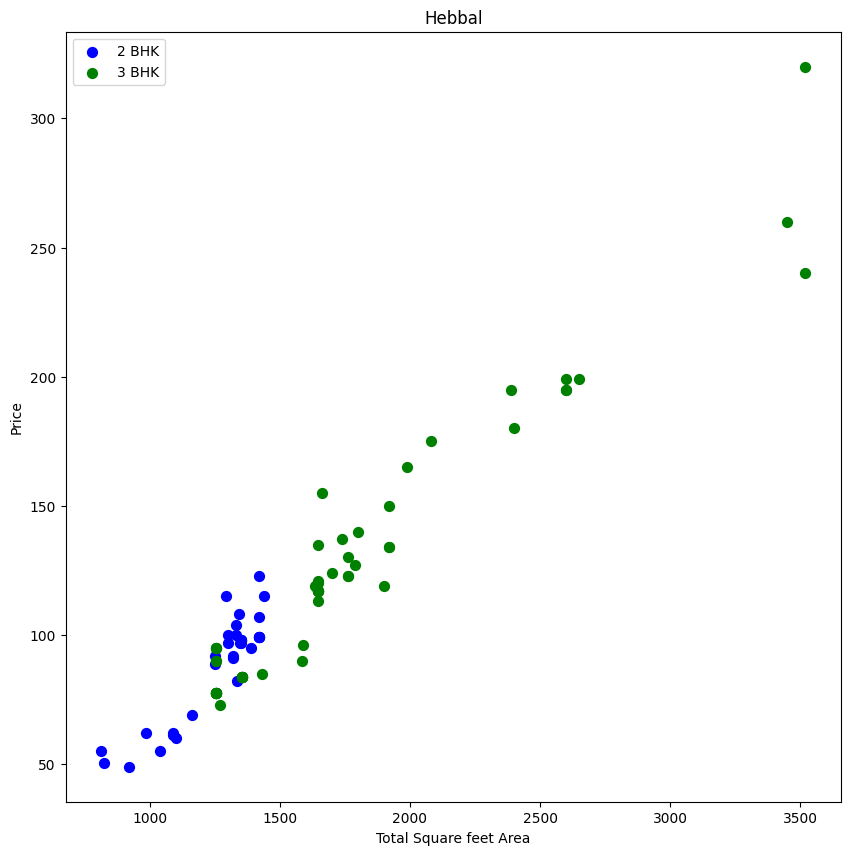

In [57]:
plot_chart(df7,"Hebbal")

We can clearly see som 2 bedroomed houses are more expensive than 3 bedroom houses

In [58]:
def remove_bhk_otliers(df):
    ''' This function calculates the statistical values of bhk n and then
       compares it with bhk n-1 simply removing outliers  and
        does not allow to have bhk n-1 values that are smaller than the mean of bhk n'''
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [59]:
df8=remove_bhk_otliers(df7)
df8.shape,df7.shape

((6847, 8), (9500, 8))

<Axes: xlabel='price_per_sqft', ylabel='Count'>

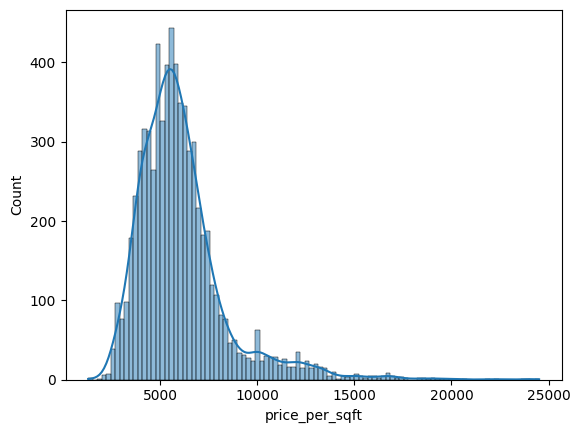

In [60]:
sns.histplot(df8.price_per_sqft,kde=True)

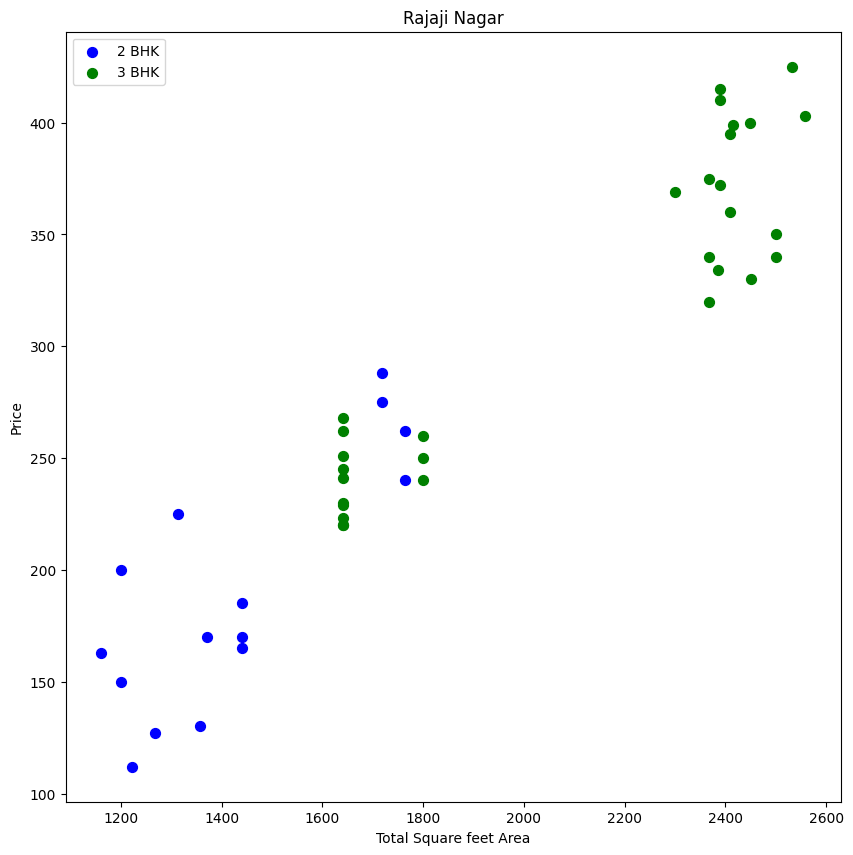

In [61]:
plot_chart(df8,"Rajaji Nagar")

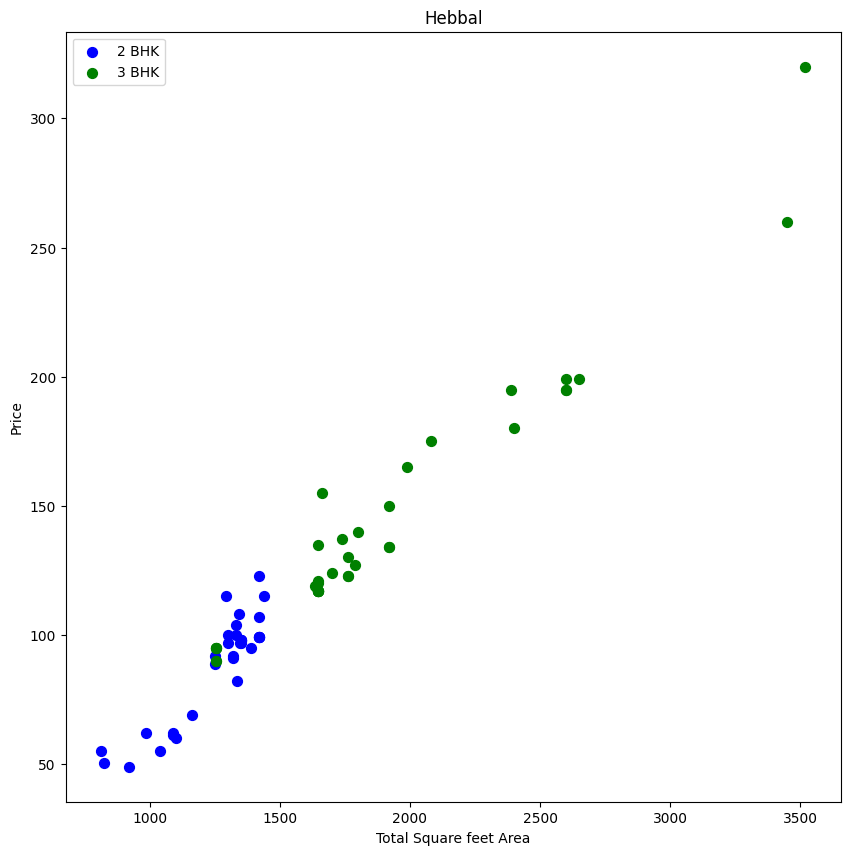

In [62]:
plot_chart(df8,"Hebbal")

As we can see here we have no more 3 bhk values that are not even smaller than the mean of the 2 bhk values


array([[<Axes: title={'center': 'price_per_sqft'}>]], dtype=object)

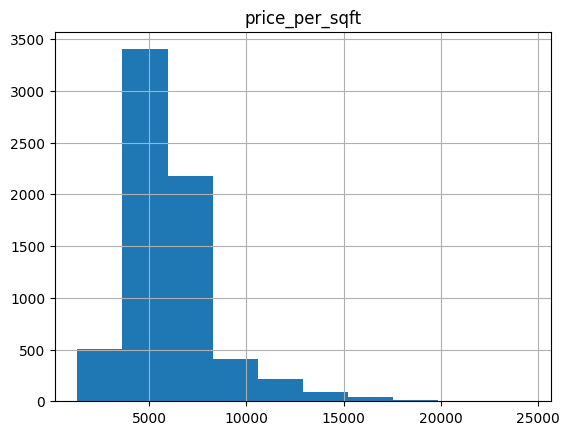

In [63]:
df8.hist('price_per_sqft')

What we can say logically is there cant be a house that has more bathrooms than the bedrooms so we can track them and remove them from our data

In [64]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(6774, 8)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

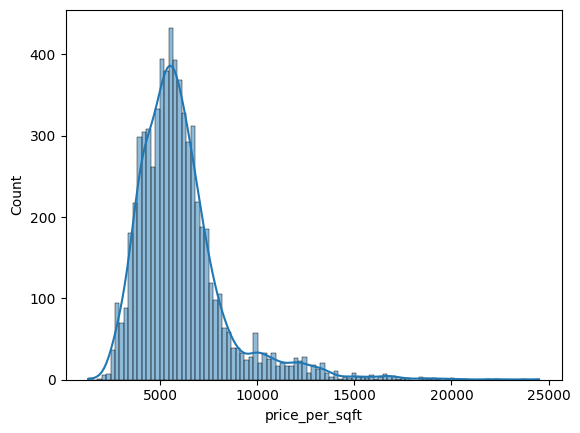

In [65]:
sns.histplot(df9.price_per_sqft,kde=True)

In [66]:
df9[['bhk','bath']].head(50)

,bhk,bath
0,4,4.0
1,3,3.0
2,3,2.0
3,3,2.0
4,2,2.0
5,4,4.0
6,4,4.0
8,3,3.0
9,3,4.0
11,3,3.0


<Axes: xlabel='bhk', ylabel='bath'>

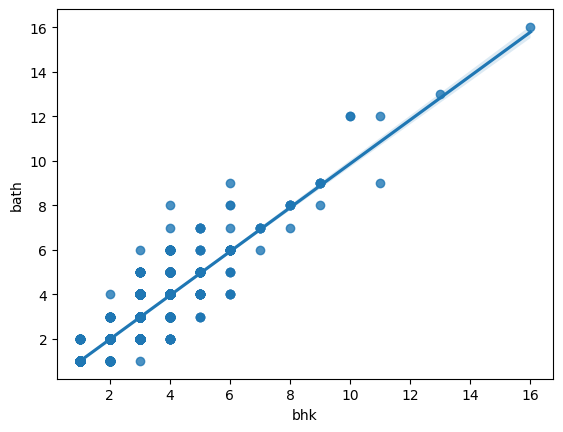

In [67]:
sns.regplot(x='bhk',y='bath',data=df8)

<Axes: xlabel='bhk', ylabel='bath'>

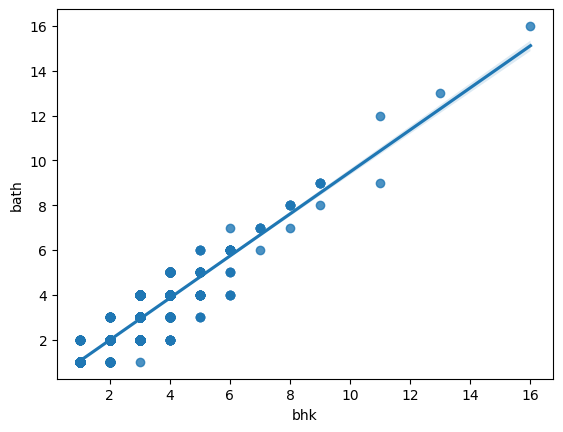

In [68]:
sns.regplot(x='bhk',y='bath',data=df9)

6. Transforming features

In [69]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')


In [70]:
for label,content in df10.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(f'{label} has {content.nunique()} unique values')
    print(content.unique())

location has 242 unique values
['1st Block Jayanagar' '1st Phase JP Nagar' '2nd Phase Judicial Layout'
 '2nd Stage Nagarbhavi' '5th Block Hbr Layout' '5th Phase JP Nagar'
 '6th Phase JP Nagar' '7th Phase JP Nagar' '8th Phase JP Nagar'
 '9th Phase JP Nagar' 'AECS Layout' 'Abbigere' 'Akshaya Nagar'
 'Ambalipura' 'Ambedkar Nagar' 'Amruthahalli' 'Anandapura' 'Ananth Nagar'
 'Anekal' 'Anjanapura' 'Ardendale' 'Arekere' 'Attibele' 'BEML Layout'
 'BTM 2nd Stage' 'BTM Layout' 'Babusapalaya' 'Badavala Nagar' 'Balagere'
 'Banashankari' 'Banashankari Stage II' 'Banashankari Stage III'
 'Banashankari Stage V' 'Banashankari Stage VI' 'Banaswadi'
 'Banjara Layout' 'Bannerghatta' 'Bannerghatta Road' 'Basavangudi'
 'Basaveshwara Nagar' 'Battarahalli' 'Begur' 'Begur Road' 'Bellandur'
 'Benson Town' 'Bharathi Nagar' 'Bhoganhalli' 'Billekahalli' 'Binny Pete'
 'Bisuvanahalli' 'Bommanahalli' 'Bommasandra'
 'Bommasandra Industrial Area' 'Bommenahalli' 'Brookefield' 'Budigere'
 'CV Raman Nagar' 'Chamrajpet' '

In [71]:

pd.get_dummies(df10.location).head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
dummies=pd.get_dummies(df10.location)
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As we want to see We-have keep the fraction between bath and bhk

7. Lets see the mutual information about these features

In [74]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_score(df):
    mi_scores=mutual_info_regression(df.drop(columns=['price']),df['price'])
    mi_scores=pd.Series(mi_scores,name='MI Scores',index=df.drop(columns=['price']).columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    return mi_scores




In [75]:
def plot_mi_scores(scores):

    plt.figure(figsize=(6,(0.25)*len(scores)))
    scores.plot(kind="barh",color="royalblue")
    plt.xlabel("Mutual Information Score")
    plt.ylabel("Features")
    plt.title("Mutual Information Scores")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.8)

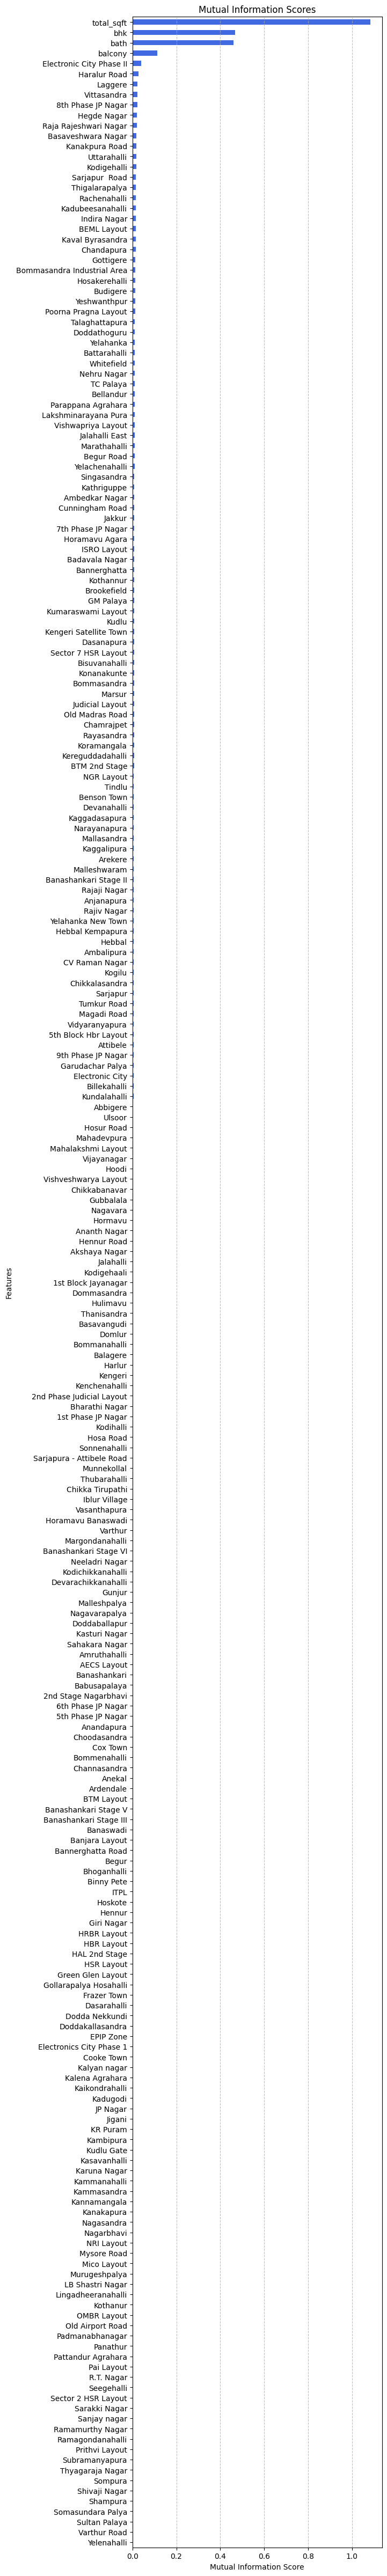

In [76]:
scores=make_mi_score(df12)
plot_mi_scores(scores)

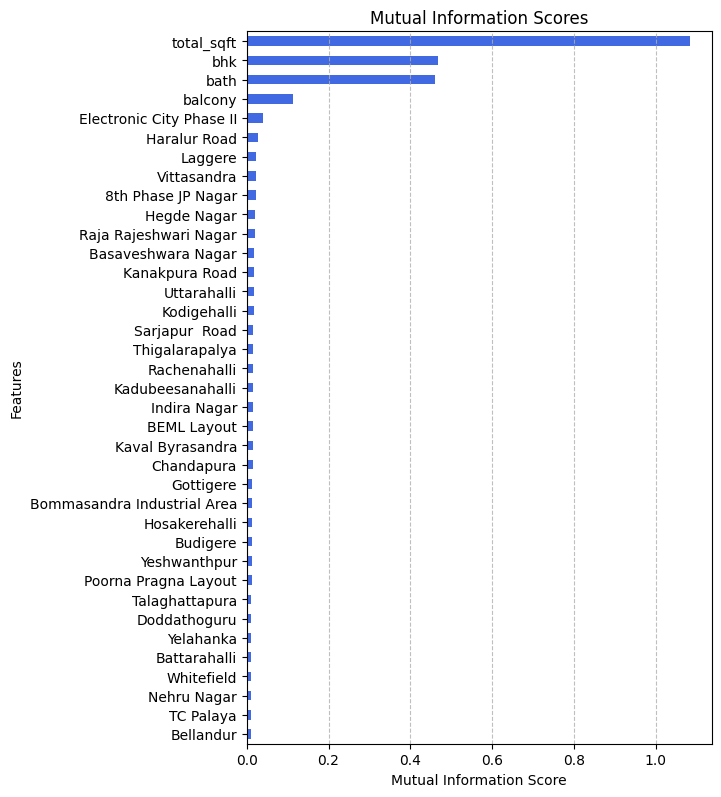

In [77]:
plot_mi_scores(scores[scores>0.01])

8. Modelling

In [78]:
X=df12.drop('price',axis='columns')
y=df12['price']


In [79]:
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [80]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_clf=LinearRegression()
linear_clf.fit(X_train,y_train)
linear_clf.score(X_test,y_test)

0.8588371659692939

In [83]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.8676499 , 0.85540833, 0.80592544, 0.85714826, 0.81395273])

In [86]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
      gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model':algo_name,
          'best_score':gs.best_score_,
          'best_params':gs.best_params_
      })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [87]:
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.840032,{'fit_intercept': False}
1,lasso,0.706958,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.660132,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [88]:
X_train.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
3512,1150.0,2.0,3.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1126,1112.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8708,520.0,2.0,0.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1294,1153.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1287,1153.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
def predict_price(location,sqft,bath,bhk,balcony):
    loc_index = np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=balcony
    x[3]=bhk

    if loc_index >0:
      x[loc_index] =1
    return linear_clf.predict([x])[0]


In [95]:
predict_price('1st Phase JP Nagar',1000, 3, 3,2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(89.96992441540019)

In [96]:
predict_price('Indira Nagar',1000, 3, 3,2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(169.2103779216077)

In [97]:
import pickle
with open ("bangolore_prices_predictor.pickle","wb") as f:
     pickle.dump(linear_clf,f)